In [12]:
#Import required libraries 
from tensorflow import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library
#Reading data 
r = pd.read_csv("./data/winequality-red.csv", delimiter=";")
r["colour"] = 1
w = pd.read_csv("./data/winequality-white.csv", delimiter=";")
w ["colour"] = 0
data = pd.concat([r, w])
print("Describing the data:\n", data.describe())
print("Info of the data:\n", data.info())

Describing the data:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000        

In [13]:

print("10 first samples of the dataset:\n",data.head(10))
print("10 last samples of the dataset:\n",data.tail(10))


10 first samples of the dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0           

In [14]:

print(data["colour"].unique())
# data.loc[data["colour"]=="Iris-setosa","colour"]=0
# data.loc[data["colour"]=="Iris-versicolor","colour"]=1
# data.loc[data["colour"]=="Iris-virginica","colour"]=2
print(data.head())


[1 0]
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  colour  
0      9.4        5       1  
1      9.8        5 

In [15]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
742             6.5             0.615         0.00             1.9      0.065   
3872            7.3             0.360         0.54            13.3      0.054   
4544            5.8             0.280         0.30             3.9      0.026   
4150            7.6             0.480         0.31             9.4      0.046   
620             6.5             0.460         0.41            16.8      0.084   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
742                   9.0                  18.0  0.99720  3.46       0.65   
3872                 63.0                 193.0  0.99864  3.06       0.49   
4544                 36.0                 105.0  0.98963  3.26       0.58   
4150                  6.0                 194.0  0.99714  3.07       0.61   
620                  59.0                 222.0  0.99930  3.18       0.58   

      alcohol  quality  colour  
742      9.20    

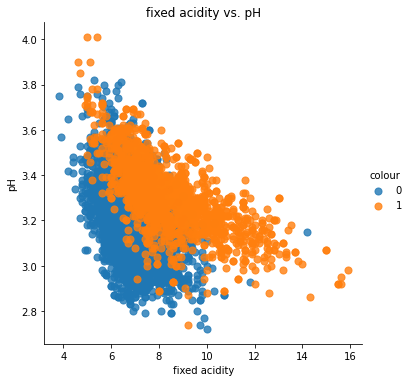

In [21]:
sns.lmplot(x='fixed acidity',
  y='pH',
  data=data,
  fit_reg=False,
  hue="colour",
  scatter_kws={"marker": "D",
              "s": 50})
plt.title('fixed acidity vs. pH')
plt.show()


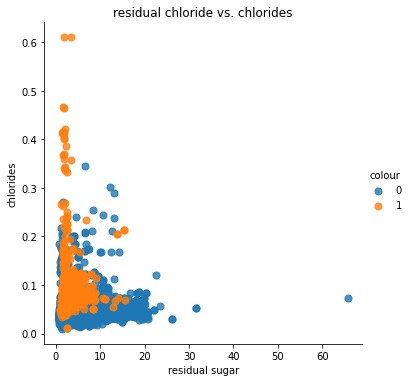

In [22]:
sns.lmplot(x='residual sugar',
  y='chlorides',
  data=data,
  fit_reg=False,
  hue="colour",
  scatter_kws={"marker": "D",
              "s": 50})
plt.title('residual chloride vs. chlorides')
plt.show()

In [ ]:
sns.lmplot(x='sepal_length',
  y='petal_length',
  data=data,
  fit_reg=False,
  hue="colour",
  scatter_kws={"marker": "D",
              "s": 50})
plt.title('sepal length vs petal length')
plt.show()

In [ ]:
# sns.lmplot(x='sepal_width',
#   y='petal_width',
#   data=data,
#   fit_reg=False,
#   hue="colour",
#   scatter_kws={"marker": "D",
#               "s": 50})
# plt.title('SepalWidth vs PetalWidth')
plt.show()

In [32]:
data=data.iloc[np.random.permutation(len(data))]



In [34]:
print(data.shape)
X=data.iloc[:,0:11].values


(6497, 13)


In [35]:
y=data.iloc[:,12].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (6497, 11)
Shape of y (6497,)
Examples of X
 [[6.9000e+00 5.2000e-01 2.5000e-01 2.6000e+00 8.1000e-02 1.0000e+01
  3.7000e+01 9.9685e-01 3.4600e+00 5.0000e-01 1.1000e+01]
 [5.9000e+00 2.4000e-01 1.2000e-01 1.4000e+00 3.5000e-02 6.0000e+01
  2.4700e+02 9.9358e-01 3.3400e+00 4.4000e-01 9.6000e+00]
 [7.2000e+00 2.4000e-01 2.7000e-01 1.1400e+01 3.4000e-02 4.0000e+01
  1.7400e+02 9.9773e-01 3.2000e+00 4.4000e-01 9.0000e+00]]
Examples of y
 [1 0 0]


In [36]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])


Examples of X_normalised
 [[0.01167721 0.01709146 0.00885657 0.00446194 0.01520684 0.00351356
  0.00356376 0.01243314 0.01332063 0.0112435  0.01292404]
 [0.00998486 0.00788837 0.00425115 0.00240258 0.00657086 0.02108136
  0.02379051 0.01239235 0.01285865 0.00989428 0.01127916]
 [0.01218492 0.00788837 0.00956509 0.01956389 0.00638312 0.01405424
  0.01675931 0.01244411 0.01231966 0.00989428 0.01057422]]


In [37]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 5197 y: 5197
Length of test set x: 1300 y: 1300


In [45]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [50]:
model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                50050     
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 93        
Total params: 56,673
Trainable params: 56,673
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 55ms/step - loss: 1.0941 - accuracy: 0.4486 - val_loss: 1.0759 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.8498 - val_loss: 1.0477 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0381 - accuracy: 0.8932 - val_loss: 1.0118 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0028 - accuracy: 0.9823 - val_loss: 0.9636 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.9459 - accuracy: 0.9245 - val_loss: 0.9024 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.8747 - accuracy: 0.9524 - val_loss: 0.8265 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.7936 - accuracy: 0.9593 - val_loss: 0.7378 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=================

In [52]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 100.0
